# Movie Recommendation for Sussex Budget Productions based on IMDB data


 # 1. Intoduction

## 1.1 Background

Film producers can make a huge profit when a movie is a commercial success in addition to entertaining the audience. Many elements, including great directors and skilled actors, are important for making good movies. Famous actors and directors can, however, always bring in the anticipated box office revenue but cannot ensure a good imdb score.

## 1.2 Data Description

The provided dataset covers 100 years, from 1916 to 2016, and includes 28 distinct characteristics for 5043 films from 50 different countries. There are thousands of cast members, as well as 2398 unique director names. The response variable is "imdb score," and the remaining 27 attributes are just potential predictors.


## 1.3 Problem Statement

How can we increase this Return on Investment while maintaining the overall performance of the company?

Since the last movie made by production house was "comedy-action-thriller" genre , which failed to earn back their own investment at the box office. Hence we must do an analysis that provides us with evidence as to what sorts of films would perform better.

The business is now prepared to convince investors to invest £1.5 million, and they must achieve a good ROI in order to maintain the company's financial performance even after a loss.

We want to examine the kind of movies that are more popular, or have higher IMDB ratings. 
By leveraging Pandas, matplotlib and seaborn libraries to visualise the results in graphs and charts, which will help to demonstrate the analysis's findings in an understandable manner.

I can determine the next best measures to do in order to get a decent return on investment after conducting all the exploratory data analysis. The findings may greatly assist movie studios in comprehending the formula for creating a box office hit.

In [1]:
#standard imports for when working with numpy, pandas, matplotlib and seaborn


import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# 2. Data Wrangling

I will load the data and see significant metadata statistics for further data insights, since it is crucial to ensure that the metadata is consistent otherwise it may pose challenges.

In [2]:

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv('movie_metadata.csv',index_col=None)

In [3]:
#To know the dimension of the dataset that is Number of rows,columns.
df.shape

(5043, 28)

5043 observations throughout all 28 variables were adequately observed, according to the case.

In [4]:
#Print a concise summary of a DataFrame including datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
#It  generates  descriptive statistics for each column.
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
# print first five rows of the dataset
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
df.duplicated().sum()

45

There are 45 duplicated and redundant rows in the dataframe which will be removed in the further Data Cleansing phase.

In [8]:
#Prints the total number of Zero values in each column
df.isin([0]).sum()

color                           0
director_name                   0
num_critic_for_reviews          0
duration                        0
director_facebook_likes       907
actor_3_facebook_likes         89
actor_2_name                    0
actor_1_facebook_likes         26
gross                           0
genres                          0
actor_1_name                    0
movie_title                     0
num_voted_users                 0
cast_total_facebook_likes      33
actor_3_name                    0
facenumber_in_poster         2152
plot_keywords                   0
movie_imdb_link                 0
num_user_for_reviews            0
language                        0
country                         0
content_rating                  0
budget                          0
title_year                      0
actor_2_facebook_likes         55
imdb_score                      0
aspect_ratio                    0
movie_facebook_likes         2181
dtype: int64

In [9]:

#Percentage of unique values in our data
(df.nunique()/len(df)*100).sort_values(ascending = False)


movie_imdb_link              97.541146
movie_title                  97.501487
num_voted_users              95.697006
plot_keywords                94.388261
gross                        80.011898
cast_total_facebook_likes    78.881618
actor_3_name                 69.819552
actor_2_name                 60.122943
director_name                47.551061
actor_1_name                 41.582391
num_user_for_reviews         18.917311
actor_2_facebook_likes       18.183621
genres                       18.124132
actor_3_facebook_likes       17.965497
actor_1_facebook_likes       17.410272
movie_facebook_likes         17.370613
num_critic_for_reviews       10.469958
budget                        8.705136
director_facebook_likes       8.625818
duration                      3.787428
title_year                    1.804481
imdb_score                    1.546698
country                       1.288915
language                      0.931985
aspect_ratio                  0.436248
facenumber_in_poster     

In [10]:
#To check the missing values - It will provide us the count of total rows in each column those containing null values
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

<AxesSubplot:>

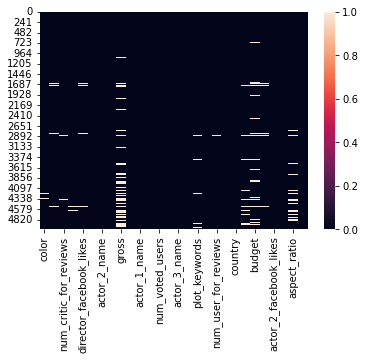

In [11]:
sns.heatmap(df.isnull())

We must clean the data before utilising it for the real analysis of the data because the heatmap in the image above indicates the distribution of null values across the columns.

# 3.Data Cleaning

I will attempt to resolve the issues of duplicate data, missing values, and format .

1.Fill the Nan Values and Blanks wherever we can.

2.Remove duplicate rows from the dataset.

3.Determine and filter necessary columns that are useful for my analysis.

4.Remove all the rows in which the movies are having zero value of budget ,gross, since those rows won't be useful for my analysis.

5.Reducing digits for better readability.

In [12]:
#Removng 45 duplicates rows which we had observed in Data wrangling phase
df.drop_duplicates(subset=None,inplace=True)
# To verify is there any still duplicate rows exist.
sum(df.duplicated())

0

In [13]:
#Replace null/not an number values with 0.
df.replace(np.nan,0,inplace = True) 


In [14]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

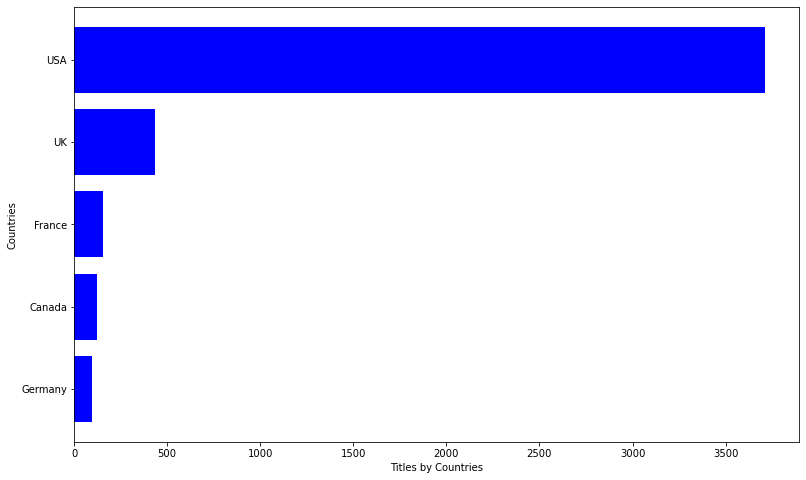

In [15]:
df_country=df.groupby(['country']).agg({"movie_title":"nunique"}).reset_index().sort_values(by=['movie_title'],ascending=False)[:5]
plt.figure(figsize=(13,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['movie_title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

From the above plot, we can see that most films are created and released in the USA market. So, for my analysis, I will further filter the USA market to target a certain market and obtain fair and higher returns.

In [16]:
 #Filtering budget column with non zero values
df = df[df['budget']!=0]

#Filtering gross column with non zero values
df = df[df['gross']!=0] 

 # filtering the budget value with less than or equal to 1500000
df = df[df['budget']<=1500000] 

##Filtering the country here- since USA Is the leading country
df = df[df['country']=='USA'] 

In [17]:
df.shape

(219, 28)

<AxesSubplot:>

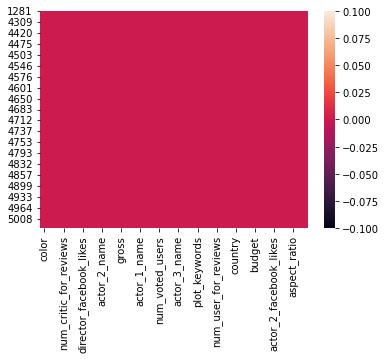

In [18]:
#To verify there are no null values
sns.heatmap(df.isnull())

In [19]:
#let's change the budget and gross columns units from GBP to million GBP 
df['gross'] = (df['gross'] / 1000000)
df['budget'] =( df['budget'] / 1000000)


In [20]:
df.rename({'gross':'gross_in_million','budget':'budget_in_million'},axis=1, inplace=True)

In [21]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_in_million,genres,...,num_user_for_reviews,language,country,content_rating,budget_in_million,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1281,Color,Martin Scorsese,112.0,112.0,17000.0,354.0,David Carradine,22000.0,0.032645,Crime|Drama|Romance|Thriller,...,223.0,English,USA,R,0.500000,1973.0,926.0,7.4,1.85,0
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32.000000,Horror|Mystery|Thriller,...,1040.0,English,USA,R,0.806947,1960.0,332.0,8.5,1.85,18000
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21.378000,Fantasy|Horror,...,335.0,English,USA,R,1.000000,1980.0,826.0,6.8,2.35,7000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47.000000,Horror|Thriller,...,1191.0,English,USA,R,0.300000,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30.859000,Horror|Thriller,...,826.0,English,USA,R,0.083532,1974.0,371.0,7.5,1.85,0


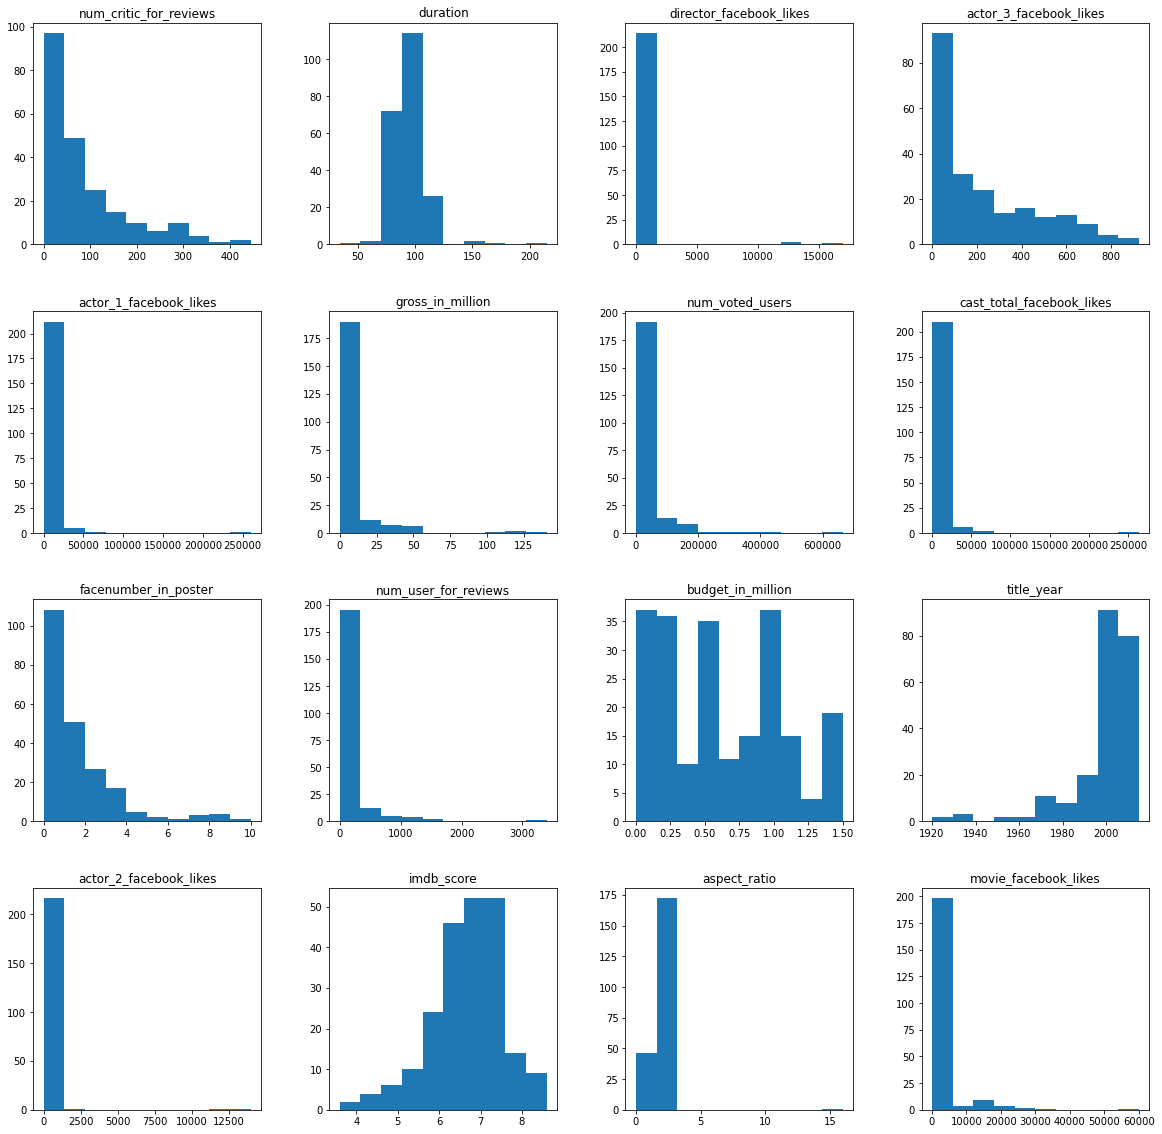

In [22]:
df.hist(figsize=[20,20],grid=False)
plt.show()

Above histogram shows the distribution of data points in each columns.

# 4. Exploratory Data Analysis

I will make use of Pandas, Seaborn, and matplotlib libraries for making appropriate analysis and visualizations.

## 4.1 Determine Profit and ROI

1. Add a new column called profit that is made of the difference between the gross and budget columns.
2. Divide the profit made from a budget into a new column called ROI.


In [23]:
df["Profit"]= df["gross_in_million"]-df["budget_in_million"]
df["ROI"]= (df["Profit"]/ df["budget_in_million"])*100


In [24]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross_in_million,genres,...,country,content_rating,budget_in_million,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,ROI
1281,Color,Martin Scorsese,112.0,112.0,17000.0,354.0,David Carradine,22000.0,0.032645,Crime|Drama|Romance|Thriller,...,USA,R,0.500000,1973.0,926.0,7.4,1.85,0,-0.467355,-93.471000
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32.000000,Horror|Mystery|Thriller,...,USA,R,0.806947,1960.0,332.0,8.5,1.85,18000,31.193053,3865.564033
2420,Color,John Carpenter,212.0,89.0,0.0,606.0,Hal Holbrook,2000.0,21.378000,Fantasy|Horror,...,USA,R,1.000000,1980.0,826.0,6.8,2.35,7000,20.378000,2037.800000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47.000000,Horror|Thriller,...,USA,R,0.300000,1978.0,742.0,7.9,2.35,12000,46.700000,15566.666667
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30.859000,Horror|Thriller,...,USA,R,0.083532,1974.0,371.0,7.5,1.85,0,30.775468,36842.728535


<AxesSubplot:>

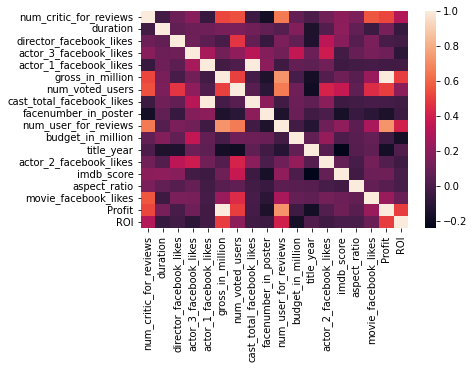

In [25]:
#For correlation of all columns, excluding NA/null values
sns.heatmap(df.corr())


### Our criteria for formulating appropriate recommendations for the studio house will be outlined in the questions below.

1.How does a genres impact ROI?

2.How does a IMDB Score impact profit and ROI?



### At this stage, I'll determine top 10 films and review  highlighting the highest budget, gross, profit, and ROI.


In [26]:
top_10_budget  = df.sort_values(by ='budget_in_million',ascending = False)[:10]
top_10_budget [['genres','movie_title', 'budget_in_million']]

,genres,movie_title,budget_in_million
4431,Comedy,Road Hard,1.5
4405,Drama,Kids,1.5
4430,Comedy|Drama,The Salon,1.5
4429,Comedy|Fantasy,My Name Is Bruce,1.5
4428,Drama,Stolen Summer,1.5
4427,Comedy|Drama|Family,Modern Times,1.5
4424,Comedy|Romance,I Want Someone to Eat Cheese With,1.5
4420,Drama,The Believer,1.5
4418,Comedy|Romance,The To Do List,1.5
4417,Drama,The Ballad of Jack and Rose,1.5


In [27]:
top_10_gross = df.sort_values(by ='gross_in_million',ascending = False)[:10]
top_10_gross[['movie_title', 'gross_in_million']]

,movie_title,gross_in_million
4707,The Blair Witch Project,140.530114
4530,Rocky,117.235247
4674,American Graffiti,115.000000
4793,Paranormal Activity,107.917283
4485,Saw,55.153403
4413,Insidious,53.991137
4545,The Devil Inside,53.245055
2492,Halloween,47.000000
4821,Halloween,47.000000
4791,Napoleon Dynamite,44.540956


In [28]:
top_10_profit = df.sort_values(by ='Profit',ascending = False)[:10]
top_10_profit[['movie_title', 'Profit']]

,movie_title,Profit
4707,The Blair Witch Project,140.470114
4530,Rocky,116.275247
4674,American Graffiti,114.223000
4793,Paranormal Activity,107.902283
4485,Saw,53.953403
4413,Insidious,52.491137
4545,The Devil Inside,52.245055
4821,Halloween,46.700000
2492,Halloween,46.700000
4791,Napoleon Dynamite,44.140956


In [29]:
top_10_roi  = df.sort_values(by ='ROI',ascending = False)[:10]
top_10_roi [['movie_title', 'ROI']]

,movie_title,ROI
4793,Paranormal Activity,719348.553333
4799,Tarnation,271466.055046
4707,The Blair Witch Project,234116.856667
4984,The Brothers McMullen,40886.400000
3278,The Texas Chain Saw Massacre,36842.728535
4936,The Texas Chain Saw Massacre,36842.728535
5035,El Mariachi,29056.000000
4956,The Gallows,22657.819000
4977,Super Size Me,17637.489231
2492,Halloween,15566.666667


## To determine which genres have created the most films, I will make horizontaI bar to visualize.

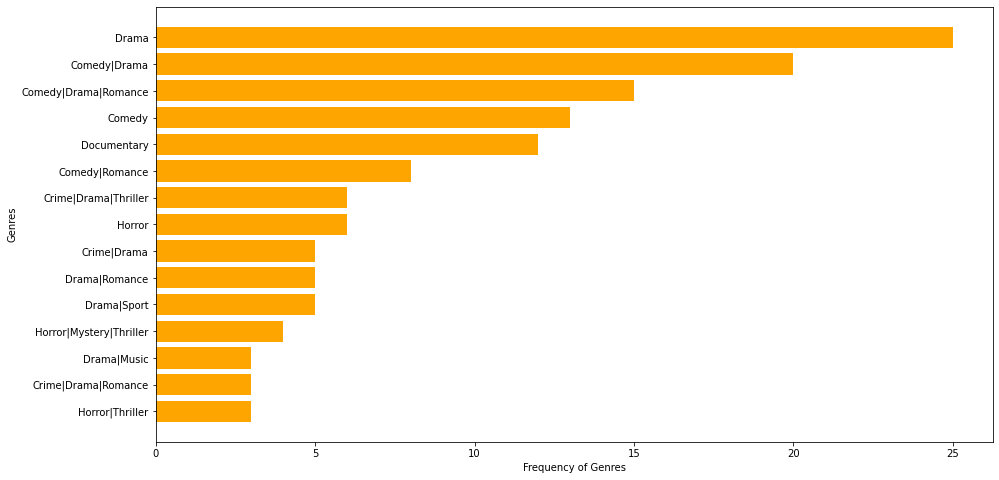

In [30]:
df_genre=df.groupby(['genres']).agg({"movie_title":"nunique"}).reset_index().sort_values(by=['movie_title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genres'], df_genre[::-1]['movie_title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

We can clearly identify that Comedy , Dramas and Romance are the most popular genre in which maximum number of movies are made.

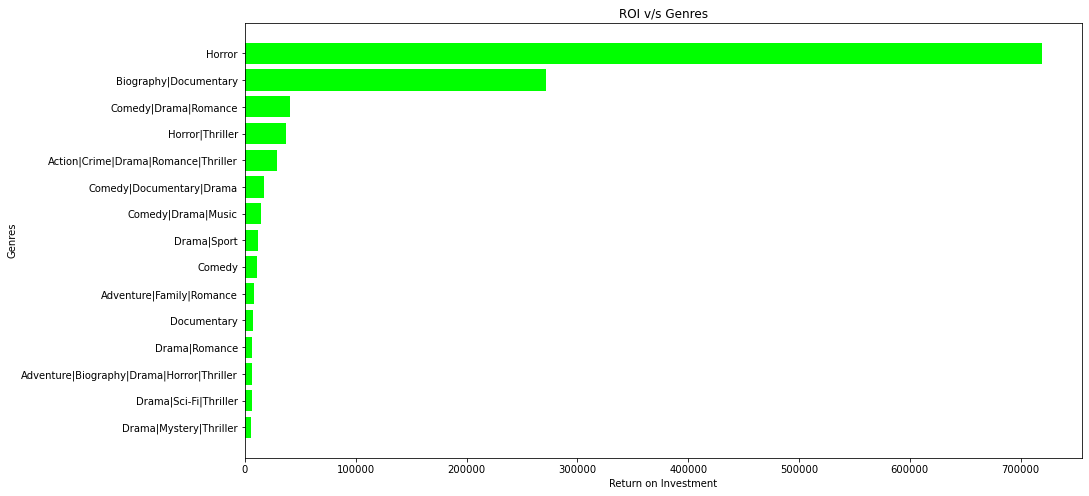

In [31]:
df_genre=df.groupby(['genres']).agg({"ROI":"max"}).reset_index().sort_values(by=['ROI'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['genres'], df_genre[::-1]['ROI'],color=['Lime'])
plt.xlabel('Return on Investment')
plt.ylabel('Genres')
plt.title('ROI v/s Genres')
plt.show()

In [32]:
#Number of movies count for the genre "Horror"
df[df['genres']=='Horror'].shape[0]

6

In [33]:
#Number of movies count for the genre "Biography|Documentary"
df[df['genres']=='Biography|Documentary'].shape[0]

1

In [34]:
#Number of movies count for the genre "'Comedy|Drama|Romance'"
df[df['genres']=='Comedy|Drama|Romance' ].shape[0]


15


The maximum Return on Investment in relation to genres is shown in the plot above. TSince the top 2 genres  have lower sample counts, I've chosen the Comedy|Drama|Romance which has 15 counts that will be helpful for the further analysis and hypothesis testing.


# 4.2 How does a IMDB Score impact profit and ROI?


Normally distributed, slightly skewed to the right. Mean value is 6.62, and the median value is 6.7.


#### Recommendation

I recommend taking into account the average Imdb score (not less than 7.0) of a director, when hiring one. We consider it will have a positive impact on profit and ROI. 


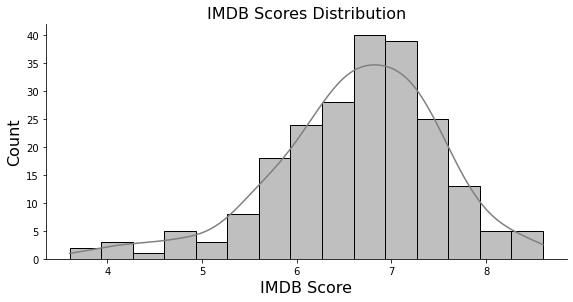

In [35]:
sns.displot(df['imdb_score'], kde = True, height = 4, aspect = 2, color = 'grey')
plt.title('IMDB Scores Distribution', fontsize = 16)
plt.xlabel('IMDB Score', fontsize = 16)
plt.ylabel('Count', fontsize = 16);

In [36]:
df['imdb_score'].describe()

count    219.000000
mean       6.627854
std        0.881565
min        3.600000
25%        6.150000
50%        6.700000
75%        7.200000
max        8.600000
Name: imdb_score, dtype: float64

#### Understanding the statistics-related computations for the samples collected, on which we can execute hypothesis testing, is accomplished by examining at the Descriptive Statistics table above.

## Hypothesis:

#### If imdb score has a strong impact on the genre of Comedy|Drama|Romance, then a raise in imdb score will lead to an increased ROI for Comedy|Drama|Romance.

In this instance, we have two variables as mentioned below:
1. Independent variable is imdb_score
2. Dependent variable is the Return on Investment.

Null Hypothesis:H0:The Return on Investment for Comedy, Drama, and Romance is unaffected by imdb score.
                    
                    Assumed mean - μ=6.2
                 
Alternative Hypothesis, H1: The investment return for Comedy, Drama, and Romance is driven by imdb score.
                    
                    Assumed mean - μ>=6.2
                    
                    
             N=15       𝑋̅(mean)=6.62    std=0.88

With the preceding data, we can compute the Z values, which is 
###### Z>=1.84.
Next we need calculate the p-value using the code mentioned below


In [37]:
#Code to determine p value
from scipy import stats
p_value=1-stats.norm.cdf(1.84)
print( p_value)

0.03288411865916385


As a result of the p-value of 0.032, which is lesser than 0.05, I am rejecting the null hypothesis and supporting the alternative one, which states that producing a comedy-drama-romance film with high IMDB ratings will increase Return on Investment.

# CONCLUSION:

I have thoroughly examined the Movie dataset provided by Suxxxex Budget Productions house and conducted Exploratory data analysis (EDA), which incorporates data wrangling and data cleansing. With the use of EDA, I have examined genres, movie counts, Profit, ROI, IMDB score, and gross. Considering the number of movies, these study results serve to identify trends and market dynamics between genres and ROI.

According to the hypothesis test on the particular genre based on IMDB ratings and ROI, Comedy|Drama| Romance will have a strong ROI well within budget of £1.5 million GBP.

In accordance with the analysis, the 'Comedy|Drama| Romance' category will likely have a successful box office performance.

According to the data research, I recommend that the comedy, drama, and romance genre movie must be developed in English and distributed in the USA market as compared to other markets for a higher return on investment.